# Exploratory Data Analysis on Spotify 2023 Dataset

## Opening the file and accessing the library

In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify-2023.csv', encoding = 'ISO-8859-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Overview of Data Set

##### How many rows and columns does the dataset contain?

In [442]:
# Assigning the two elements as X and Y which represent the row and column in the matrix

[rows, columns] = df.shape 

print("The number of rows in the data set is", rows, "and the number of columns is", columns) 

The number of rows in the data set is 953 and the number of columns is 24


##### What are the data types of each column? Are there any missing values?

In [440]:
# dtypes is used to retrieve the data types of each column 

data_types = df.dtypes
print ("The data types in each column is: \n",data_types)


The data types in each column is: 
 track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


##### Are there any missing values?

In [444]:
# df.isnull is used to check the missing values or null in the data frame

missing_val = df.isnull().sum() #To check each column to identify which part of the data is missing
print("The missing values in each column:\n", missing_val)

The missing values in each column:
 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


## Basic Descriptive Statistics

##### What are the mean, median, and standard deviation of the streams column?


In [446]:
# using errors = 'cource' in pd.to_numeric is to avoid errors that might arise from nonnumeric values
# df['streams].mean , .median , .mode is used to get the mean, median and mode from the stream column

df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

mean_streams = df['streams'].mean()   
median_streams = df['streams'].median()
std_streams = df['streams'].std()

print("Mean:", mean_streams)
print("Median:", median_streams)
print("Standard Deviation:", std_streams)


Mean: 514137424.93907565
Median: 290530915.0
Standard Deviation: 566856949.0388832


##### What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

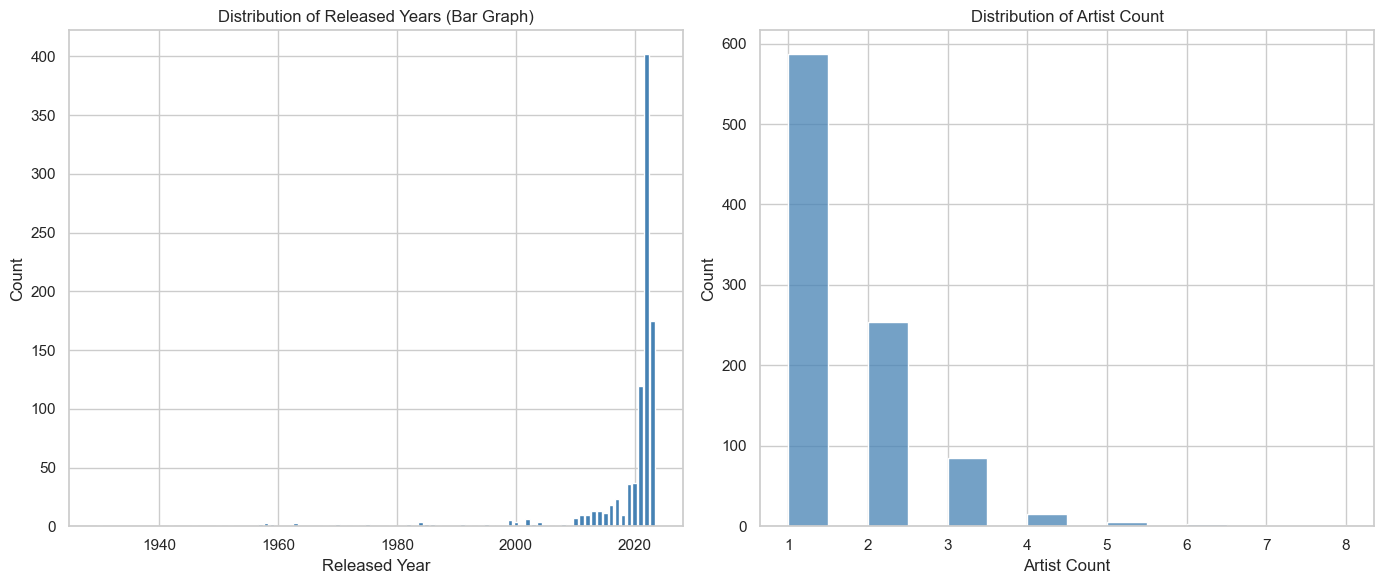

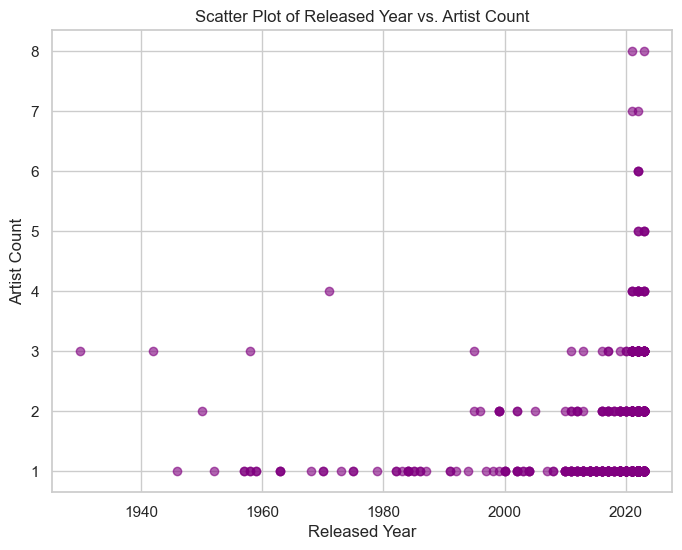

In [450]:

#To avoid Errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce') 

# Calculate the counts for each released year
released_year_counts = df['released_year'].value_counts().sort_index()  # Count each year and sort by year

# Set up the figure for side-by-side plots
plt.figure(figsize=(14, 6))

# Plot line graph data
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.bar(released_year_counts.index, released_year_counts.values, color="steelblue", width=0.8)  # Set width for thinner bars
plt.title("Distribution of Released Years (Bar Graph)")
plt.xlabel("Released Year")
plt.ylabel("Count")

# Plot Bar Plot of Artist Count
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.histplot(df['artist_count'], bins=10, kde=False, color="steelblue", binwidth=0.5)  # binwidth makes bars thinner
plt.title("Distribution of Artist Count")
plt.xlabel("Artist Count")
plt.ylabel("Count")

# Show the plot and using .tight_layout to adjust the spacing between subplots and preventing it from overlapping
plt.tight_layout()
plt.show()

#Making a Scatter Plot to show the relationship between Released Year and Artist Count
#Scatter plot to help us the connection between the two variables

plt.figure(figsize=(8, 6))
plt.scatter(df['released_year'], df['artist_count'], alpha=0.6, color="purple")
plt.title("Scatter Plot of Released Year vs. Artist Count")
plt.xlabel("Released Year")
plt.ylabel("Artist Count")
plt.grid(True) #this adds grid to the background 
plt.show()

##  Top Performers

##### Which track has the highest number of streams? Display the top 5 most streamed tracks.

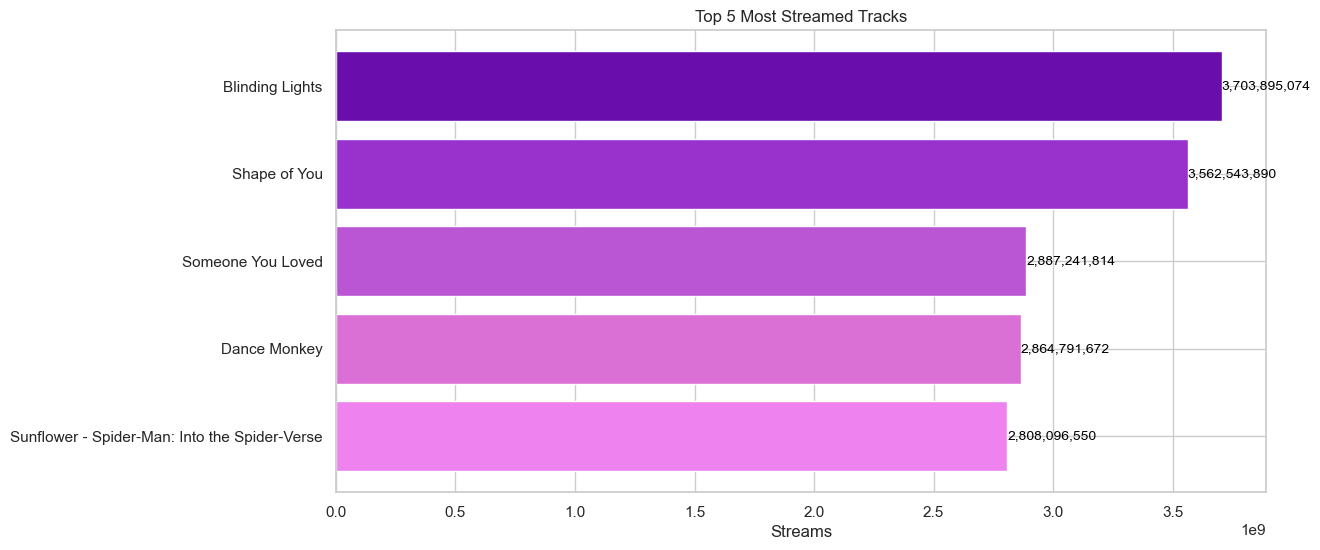

In [454]:

#Using .head() to provide the Top 5 rows which contains most streamed tracks
op_tracks = df.sort_values(by='streams', ascending=False).head(5)

# Create the bar graph
# plt.barh creates a horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(top_tracks['track_name'], top_tracks['streams'], color=['#6a0dad', '#9932cc', '#ba55d3', '#da70d6', '#ee82ee'])  # colors as preference
plt.xlabel('Streams')
plt.title('Top 5 Most Streamed Tracks')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest on top

# Add annotations
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}',  
             va='center', ha='left', color='black', fontsize=10)

plt.show()

##### Who are the top 5 most frequent artists based on the number of tracks in the dataset?

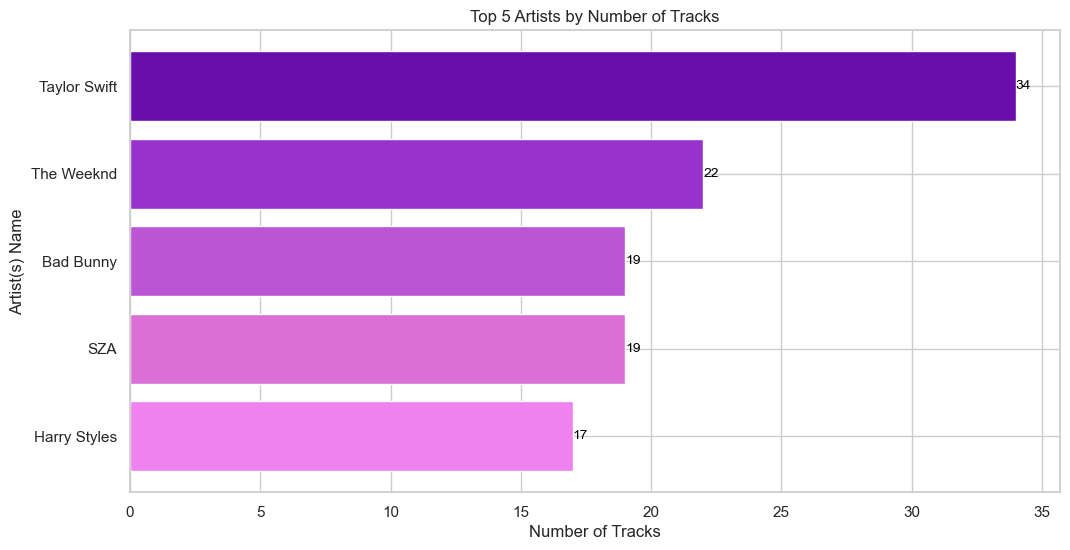

In [464]:

# using .value_counts to count how many times each artist appears in the column
artist_counts = df['artist(s)_name'].value_counts().head(5)

# filtering to only include rows with the top 5 artists
filtered_df = df[df['artist(s)_name'].isin(top5_artists)]

colors = ['#6a0dad', '#9932cc', '#ba55d3', '#da70d6', '#ee82ee']

# To create bar graph
plt.figure(figsize=(12, 6))
bars = plt.barh(top5_artists, artist_counts.values, color=colors)  # Use horizontal bars with custom colors

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', 
             va='center', ha='left', color='black', fontsize=10)

# Styling the plot
plt.title('Top 5 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist(s) Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest on top
plt.show()

## Temporal 

##### Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

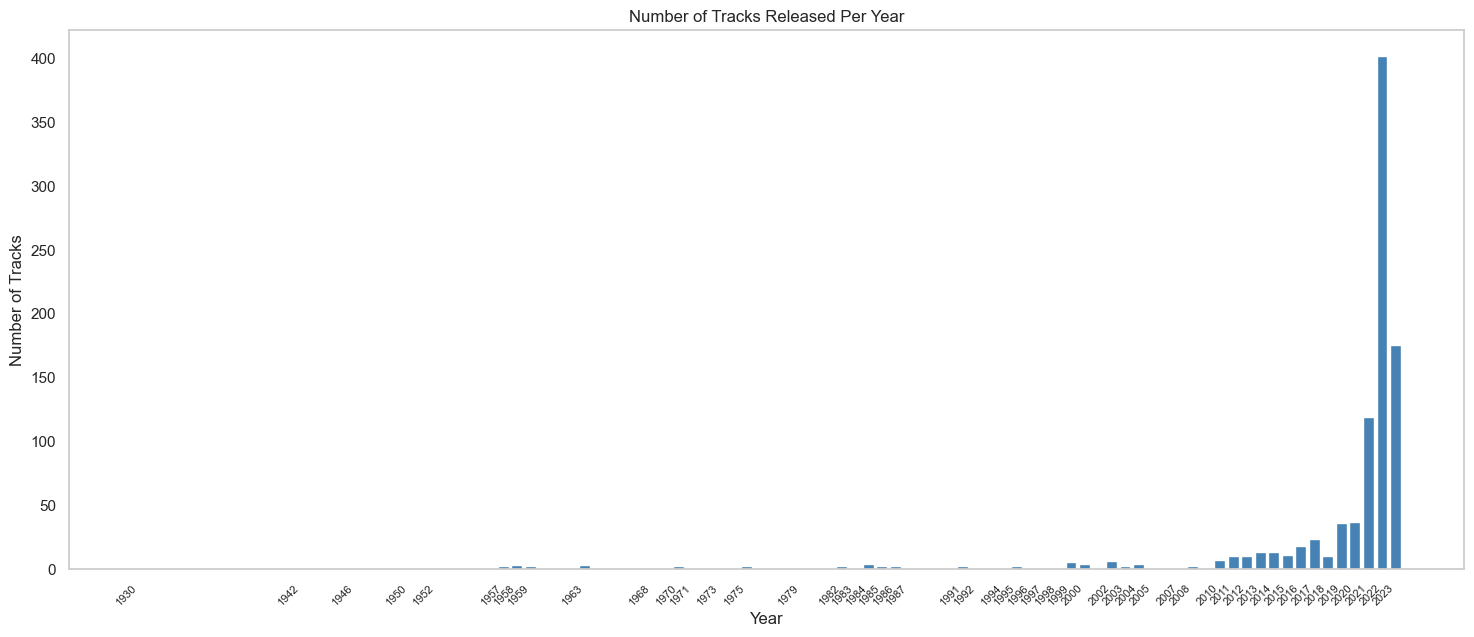

In [468]:
# .value_counts to count the number of tracks per year and sort by year
tracks_per_year = df['released_year'].value_counts().sort_index()

# Creating a bar plot for the data of the tracks released each year
plt.figure(figsize=(18, 7))  
plt.bar(tracks_per_year.index, tracks_per_year.values, color='steelblue')

plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')

# setting the x -axis by using .xticks
plt.xticks(tracks_per_year.index, rotation=45, ha='right', fontsize=8)  # Rotate labels and adjust font size

# To remove all grid lines for clarity
plt.grid(False)

plt.show()

##### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

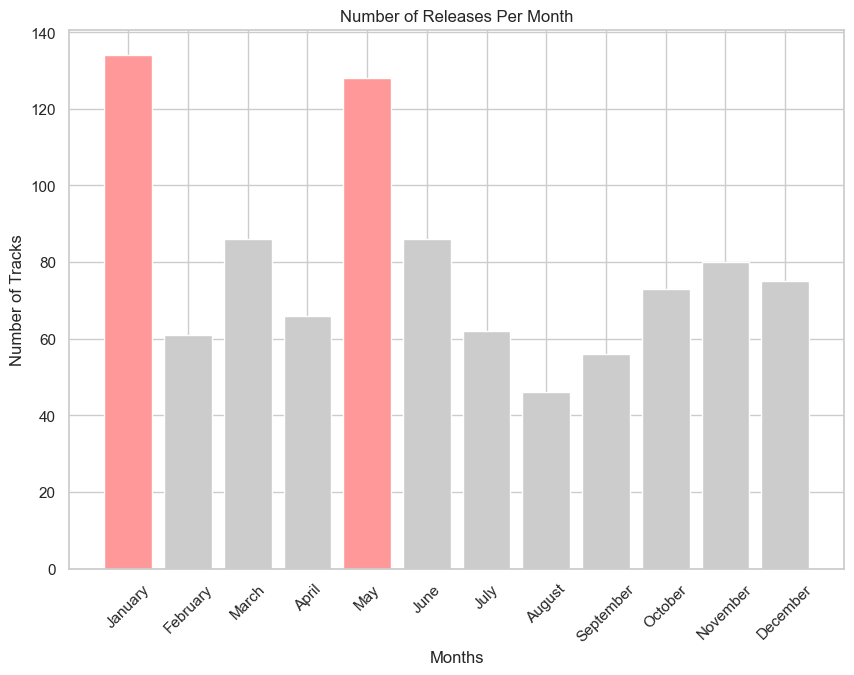

In [471]:
# Check and plot for the number of releases per month
track_month = df['released_month'].value_counts().reset_index()
track_month.columns = ['released_month', 'count']  # Rename columns

# Month mapping
months = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
          7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}


track_month['name_month'] = track_month['released_month'].map(months) #Replacing month with their names
track_month.sort_values('released_month', inplace=True)  # Sort by month numbers for proper chronological order

# Selecting the two months with the highest release counts
top_months = track_month.nlargest(2, 'count')['name_month'].values

# Highlighting the two months with the highest releases
colors = ['#ff9999' if month in top_months else '#cccccc' for month in track_month['name_month']]

# creating the plot and adding color for clarity
plt.figure(figsize=(10, 7))
plt.bar(track_month['name_month'], track_month['count'], color=colors)
plt.title("Number of Releases Per Month")
plt.xlabel("Months")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.show()

##  Genre and Music Characteristics

##### Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

Correlation between streams and the given musical attributes in the data:
streams               1.000000
acousticness_%       -0.004485
energy_%             -0.026051
valence_%            -0.040831
instrumentalness_%   -0.044902
liveness_%           -0.048337
danceability_%       -0.105457
speechiness_%        -0.112333
Name: streams, dtype: float64


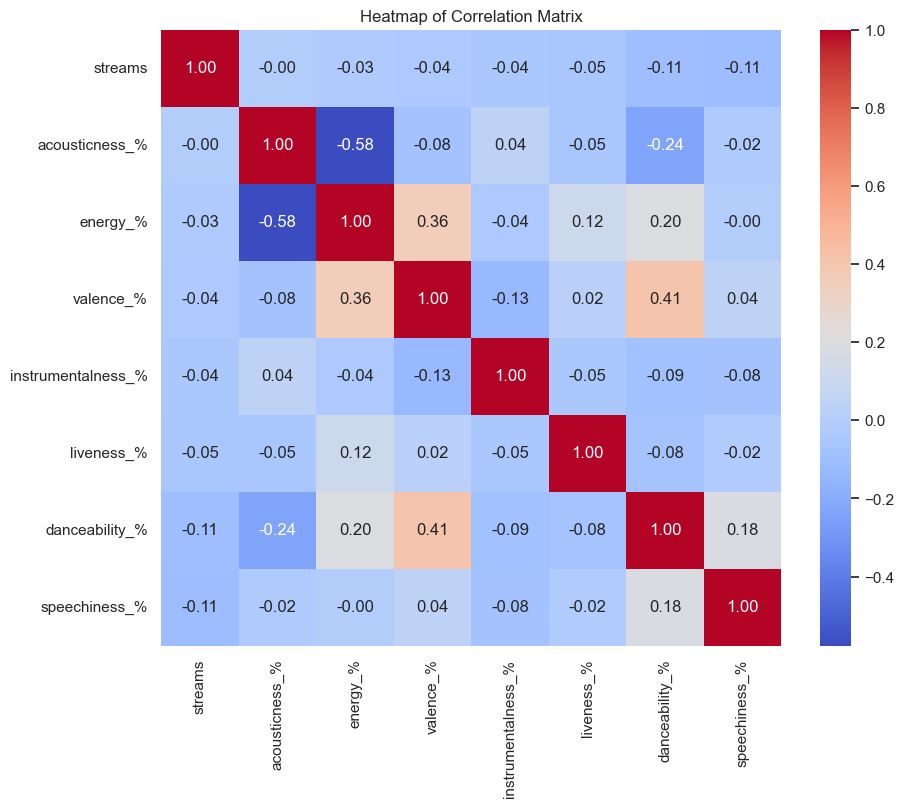

In [473]:
# Load the data set and avoid error 
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1') 


# Convert to numeric if needed and handle non-numeric entries
columns_to_convert = ['streams', 'acousticness_%', 'energy_%', 'valence_%', 'instrumentalness_%', 'liveness_%', 'danceability_%', 'speechiness_%']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Using .dropna to remove the missing values 
df.dropna(subset=columns_to_convert, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df[columns_to_convert].corr()

# Print the values
print("Correlation between streams and the given musical attributes in the data:")
print(correlation_matrix['streams'])  # Only displaying correlation with streams

# Create a heatmap using sns.heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Heatmap of Correlation Matrix')
plt.show()

##### Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

In [475]:
# Calculate the correlation between danceability_% and energy_%
correl_DE = df[['danceability_%', 'energy_%']].corr()

# Calculate the correlation between valence_% and acousticness_%
correl_VA = df[['valence_%', 'acousticness_%']].corr()

# Print the results
print("The correlation between danceability_% and energy_% is:")
print(correl_DE)
print()
print("The correlation between valence_% and acousticness_% is:")
print(correl_VA)

The correlation between danceability_% and energy_% is:
                danceability_%  energy_%
danceability_%        1.000000  0.198485
energy_%              0.198485  1.000000

The correlation between valence_% and acousticness_% is:
                valence_%  acousticness_%
valence_%        1.000000       -0.081161
acousticness_%  -0.081161        1.000000


##  Platform Popularity

##### How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

Total number of tracks in each playlist category:
in_spotify_playlists    4955719.0
in_deezer_playlists       95913.0
in_apple_playlists        64625.0
dtype: float64


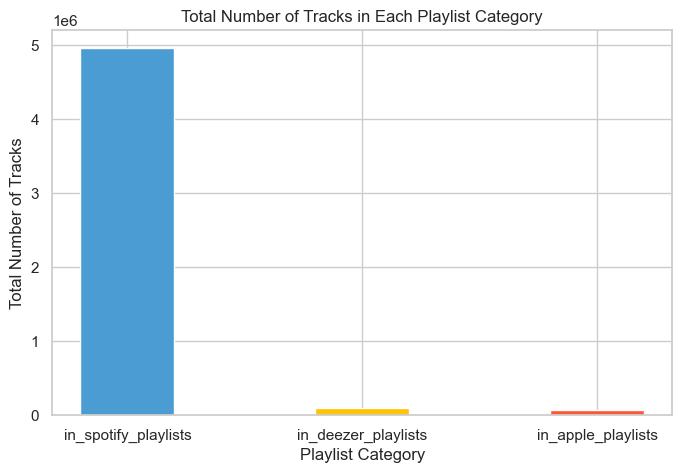

,track_name,artist(s)_name,in_spotify_playlists,in_deezer_playlists,in_apple_playlists
55,Blinding Lights,The Weeknd,43899,NaN,672
179,Shape of You,Ed Sheeran,32181,NaN,33
86,Someone You Loved,Lewis Capaldi,17836,NaN,440
620,Dance Monkey,Tones and I,24529,NaN,533
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",24094,843.0,372


In [511]:
# Load the dataset
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Convert playlist columns to numeric
playlist_columns = ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']
df[playlist_columns] = df[playlist_columns].apply(pd.to_numeric, errors='coerce')

# Getting the total number of tracks in each playlist category
total_tracks = df[playlist_columns].sum()

# Print the results
print("Total number of tracks in each playlist category:")
print(total_tracks)

# Creating a bar graph for plotting the results
colors = ["#4B9CD3", "#FFC300", "#FF5733"]  # Custom colors for each category
plt.figure(figsize=(8, 5))

# Using bar_width to lessen the thickness
bar_width = 0.4  

plt.bar(total_tracks.index, total_tracks.values, color=colors, width=bar_width)

plt.title("Total Number of Tracks in Each Playlist Category")
plt.xlabel("Playlist Category")
plt.ylabel("Total Number of Tracks")
plt.xticks(rotation=0)  # Ensure x-ticks are horizontal for readability
plt.show()

# Based on the top 5 tracks and using .loc to select specific rows
df.loc[[55, 179, 86, 620, 41], ['track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].head()

## Advance Analysis

##### Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

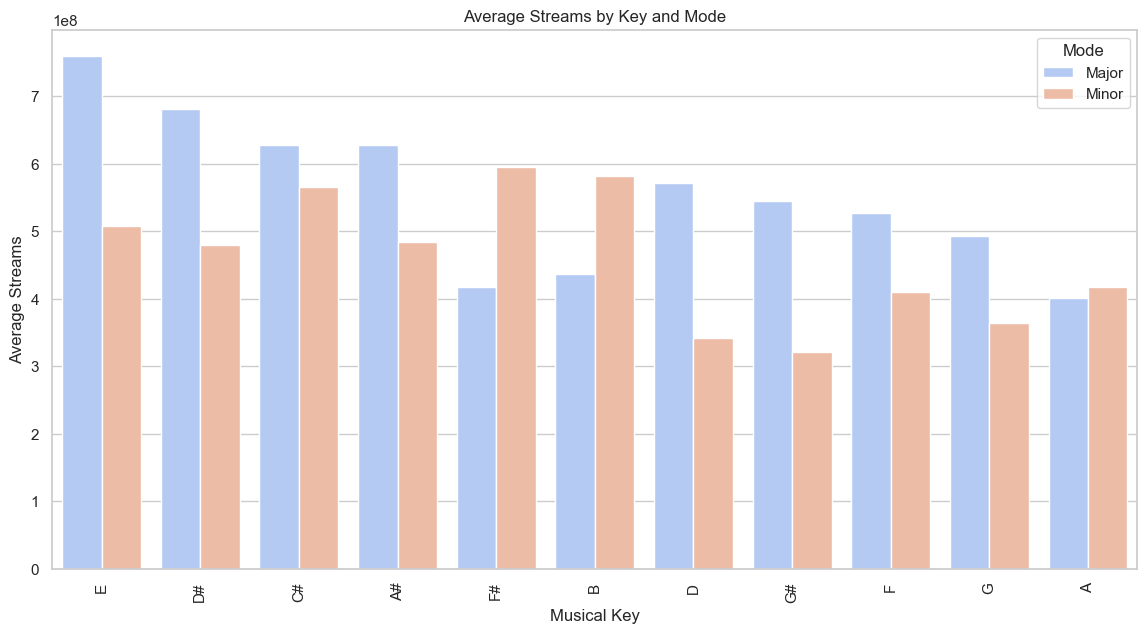

In [516]:

# load the file
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Convert 'streams' to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# To make the column more readable
if df['mode'].dtype == 'int64':
    mode_mapping = {0: 'Minor', 1: 'Major'}
    df['mode'] = df['mode'].map(mode_mapping)

# Using .dropna to drop missing values 
df.dropna(subset=['key', 'mode', 'streams'], inplace=True)

# Group by 'key' and 'mode' and calculate the average streams
grouped = df.groupby(['key', 'mode'])['streams'].mean().reset_index()

# Sort the grouped data by streams in descending order
sorted_grouped = grouped.sort_values(by='streams', ascending=False)

# Plotting the results using seaborn.barplot by putting key and streams in the xy axis.
plt.figure(figsize=(14, 7))
sns.barplot(x='key', y='streams', hue='mode', data=sorted_grouped, palette='coolwarm')
plt.title('Average Streams by Key and Mode')
plt.xlabel('Musical Key')
plt.ylabel('Average Streams')
plt.legend(title='Mode')
plt.xticks(rotation=90)  # Rotate x-axis labels for clarity if there are many keys
plt.show()


##### Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

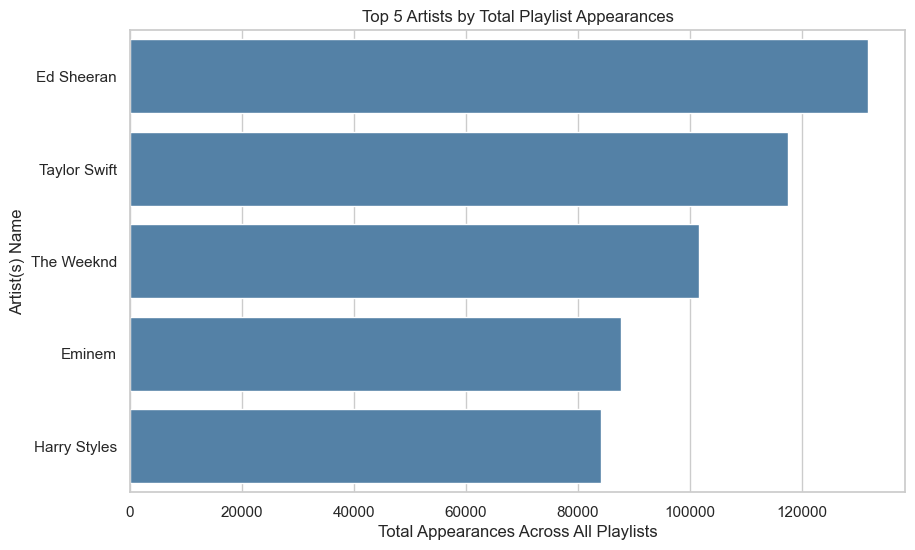

In [520]:
# Create a column
playlist_columns = ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']

# Convert columns to numeric
# .fillna replace missing value to 0
for column in playlist_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)

# To sum up the values of the column
artist_playlist_appearance = df.groupby('artist(s)_name')[playlist_columns].sum()

# Sum of all playlist columns to get total appearances per artist across all platforms
artist_playlist_appearance['total_appearances'] = artist_playlist_appearance.sum(axis=1)

# Sort artists and using .head to indicate it only the top 5
sorted_artists = artist_playlist_appearance.sort_values(by='total_appearances', ascending=False).head(5)  # Only the top 5

# Plotting the results
plt.figure(figsize=(10, 6))
# using sns.barplot to create horizontal bar plot
sns.barplot(x=sorted_artists['total_appearances'], y=sorted_artists.index, color='steelblue')
plt.title('Top 5 Artists by Total Playlist Appearances')
plt.xlabel('Total Appearances Across All Playlists')
plt.ylabel('Artist(s) Name')
plt.show()